# High F_S Cutouts

In [106]:
# imoprts
import os
import numpy as np
from importlib import reload

from matplotlib import pyplot as plt
import seaborn as sns

from gsw import density

from ulmo import io as ulmo_io 
from ulmo.llc import plotting as llc_plotting
from ulmo.llc import io as llc_io
from ulmo.plotting import plotting

In [107]:
ref_rho=1025. 
g=0.0098
dx=2.

# Load up $\Delta T = 1-1.5$ K

In [4]:
llc_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Nenya', 'Tables',
                        'LLC_A_Nenya_v1_DT15.parquet')

In [5]:
llc_tbl = ulmo_io.load_main_table(llc_file)

Read main table: /media/xavier/crucial/Oceanography/OGCM/LLC/Nenya/Tables/LLC_A_Nenya_v1_DT15.parquet


In [20]:
local_pp_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'F_S', 'PreProc',
                        'LLC_FS_preproc.h5')
local_Fs_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'F_S', 'PreProc',
                        'LLC_FS_preproc_Fs.h5')

# Stick to near 4.2, 8.8

In [10]:
Ucen = [4.2, 8.8]

In [76]:
cutU = (np.abs(llc_tbl.US0-Ucen[0]) < 0.2) & (
    np.abs(llc_tbl.US1-Ucen[1]) < 0.2) & np.isfinite(llc_tbl.FS_Npos)

In [77]:
sub_tbl = llc_tbl[cutU]

In [78]:
len(sub_tbl)

872

<Axes: ylabel='Count'>

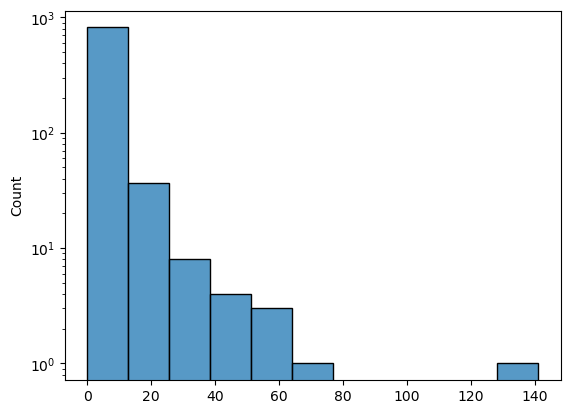

In [85]:
sns.histplot(sub_tbl.FS_Npos.values.astype(float), log_scale=(False,True))

# Highest F_S

In [86]:
sub_tbl = sub_tbl.sort_values(by=['FS_Npos'], ascending=False)

In [87]:
sub_tbl.head()

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,...,T90,T10,FS_Npos,FS_pos_sum,gradb_Npos,FS_Nneg,FS_neg_sum,US0,US1,DT
1034354,18.842533,86.135414,8885,5926,2012-05-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,981248,...,30.721001,29.713001,141,2.001887e-10,1304,39.0,-1.032745e-11,4.158422,8.804583,1.007999
657055,18.206642,124.802086,8850,7782,2012-02-29,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1342919,...,26.830000,25.739000,76,1.279698e-11,606,0.0,-2.251286e-12,4.045157,8.736286,1.091000
1462188,-22.338331,70.322914,6695,5167,2012-08-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,624078,...,21.769001,20.451000,64,1.085521e-11,450,1.0,-1.504702e-12,4.098127,8.727692,1.318001
446477,-15.713265,149.406250,7061,8963,2011-12-31,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1291966,...,29.099001,27.831001,57,1.523174e-11,659,0.0,-4.845859e-12,4.246605,8.750668,1.268000
1207627,-20.106806,91.760414,6820,6196,2012-06-30,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_FS_preproc.h5,llc_FS,64,1223270,...,23.455002,22.177002,53,1.141819e-11,365,0.0,-6.931213e-13,4.314395,8.783664,1.278000


# Look at a few

In [64]:
def plot_pair(idx):
    _, axs = plt.subplots(1,2, figsize=(10,4))
    llc_plotting.show_cutout(sub_tbl.iloc[idx],
                            local_file=local_pp_file, ax=axs[0])
    llc_plotting.show_cutout(sub_tbl.iloc[idx],
                            local_file=local_Fs_file, ax=axs[1])
    # Print
    print(f'U0={sub_tbl.iloc[idx].US0}, U1={sub_tbl.iloc[idx].US1}')
    print(f'FS_Npos={sub_tbl.iloc[idx].FS_Npos}, T={sub_tbl.iloc[idx].mean_temperature}')

U0=4.158422470092773, U1=8.804582595825195
FS_Npos=141, T=30.32937240600586


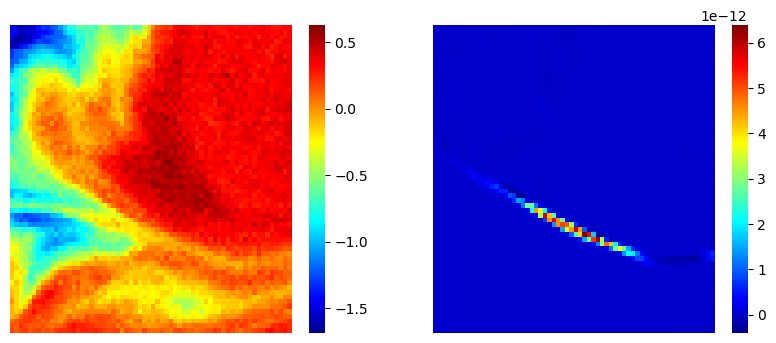

In [88]:
plot_pair(0)

U0=4.045156955718994, U1=8.736286163330078
FS_Npos=76, T=26.296188354492188


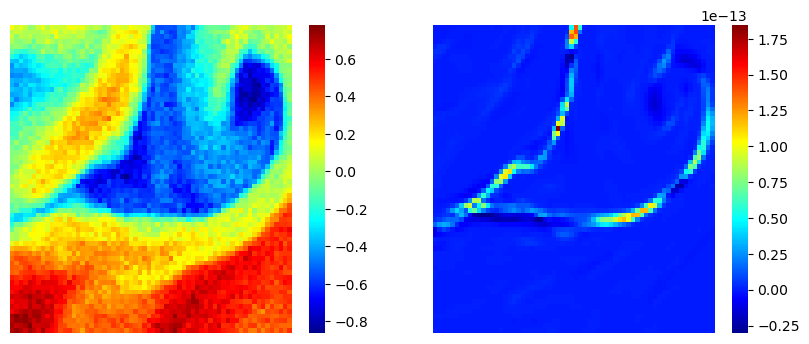

In [66]:
plot_pair(1)

U0=4.0981268882751465, U1=8.727691650390625
FS_Npos=64, T=21.00522232055664


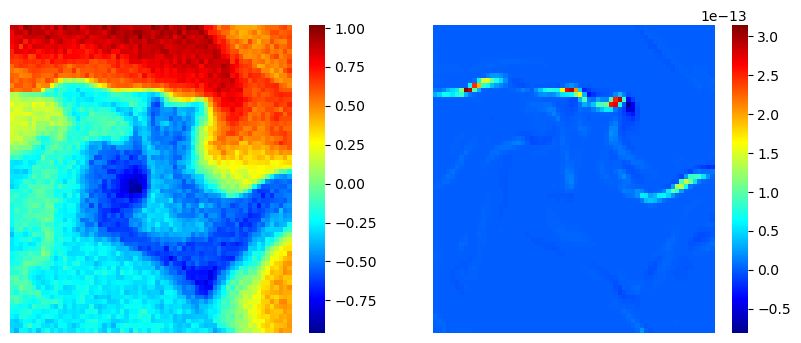

In [89]:
plot_pair(2)

## Examine like LLC fields

In [68]:
def find_close_cutouts(idx):
    r2 = (sub_tbl.US0-sub_tbl.iloc[idx].US0)**2 + (sub_tbl.US1-sub_tbl.iloc[idx].US1)
    #
    iarg = np.argsort(r2.values)
    return iarg[1:10]

In [69]:
clse_2 = find_close_cutouts(2)

U0=4.059859752655029, U1=8.600990295410156
FS_Npos=0, T=20.50169563293457


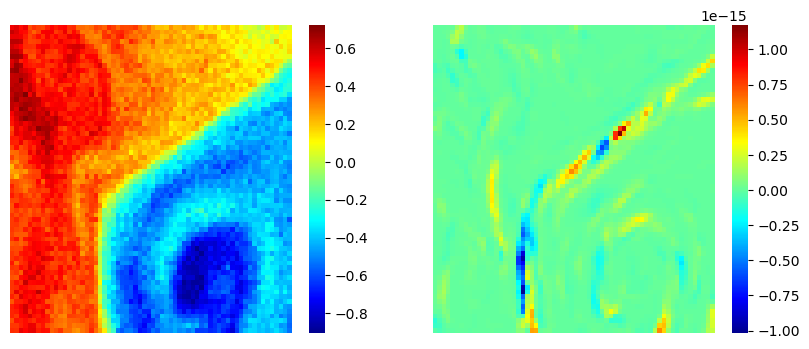

In [70]:
plot_pair(clse_2[0])

U0=4.091416835784912, U1=8.602760314941406
FS_Npos=1, T=22.761198043823242


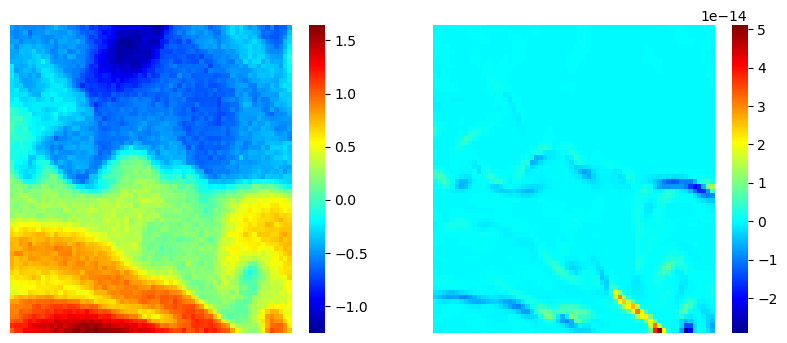

In [71]:
plot_pair(clse_2[1])

U0=4.023397445678711, U1=8.600850105285645
FS_Npos=0, T=14.184304237365723


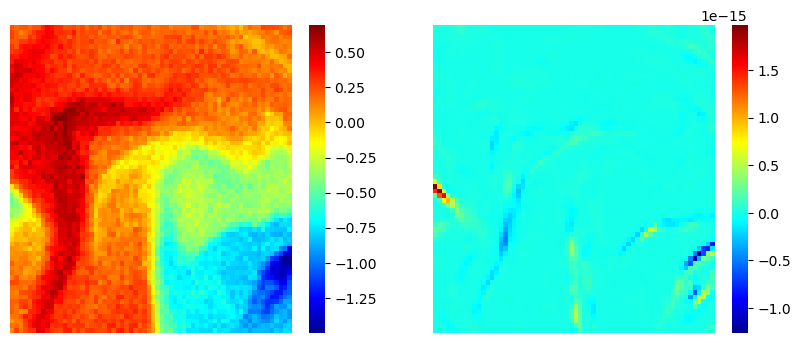

In [72]:
plot_pair(clse_2[2])

----

# Digging deeper

## Grab the various bits and pieces

In [96]:
sub_tbl.iloc[2].filename

'/data/Projects/Oceanography/data/LLC/ThetaUVSalt/LLC4320_2012-08-31T00_00_00.nc'

In [97]:
high_outputs = llc_io.grab_velocity(sub_tbl.iloc[2], add_SST=True, add_Salt=True,
                                    local_path=os.path.join(os.getenv('OS_OGCM'),
                                                            'LLC', 'data', 'ThetaUVSalt'))

In [99]:
U, V, Theta, Salt = high_outputs

In [130]:
def calc_all(outputs):
    U, V, Theta, Salt = outputs
    dUdx = np.gradient(U, axis=1)
    dVdx = np.gradient(V, axis=1)
    #
    dUdy = np.gradient(U, axis=0)
    dVdy = np.gradient(V, axis=0)
    
    rho = density.rho(Salt, Theta, np.zeros_like(Salt))
    dbdx = -1*np.gradient(g*rho/ref_rho, axis=1) / dx
    dbdy = -1*np.gradient(g*rho/ref_rho, axis=0) / dx
    #
    F_s_x = -1 * (dUdx*dbdx + dVdx*dbdy) * dbdx 
    F_s_y = -1 * (dUdy*dbdx + dVdy*dbdy) * dbdy 
    # 
    return dUdx, dVdx, dUdy, rho, dbdx, dbdy, F_s_x, F_s_y

In [121]:
dUdx, dVdx, dUdy, rho, dbdx, dbdy, F_s_x, F_s_y = calc_all(high_outputs)

<Axes: >

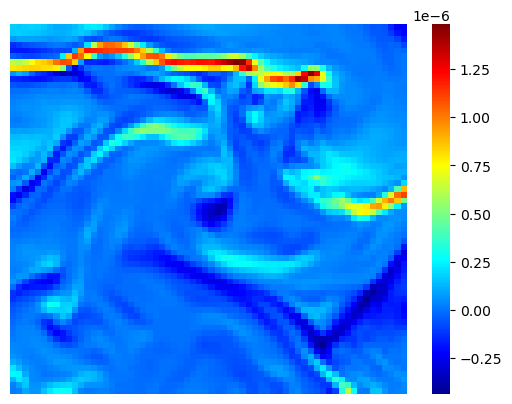

In [122]:
plotting.show_image(dbdy)

<Axes: >

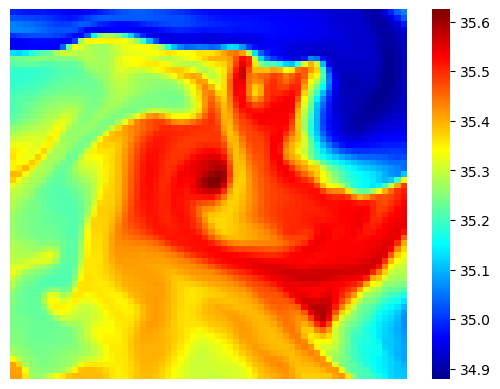

In [114]:
plotting.show_image(Salt)

<Axes: >

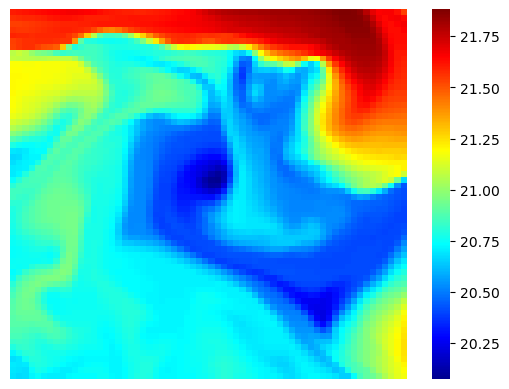

In [116]:
plotting.show_image(Theta)

<Axes: >

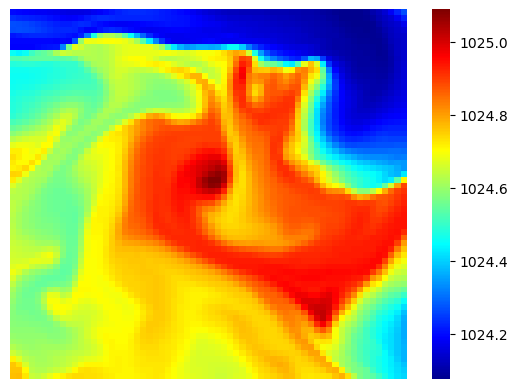

In [118]:
plotting.show_image(rho)

<Axes: >

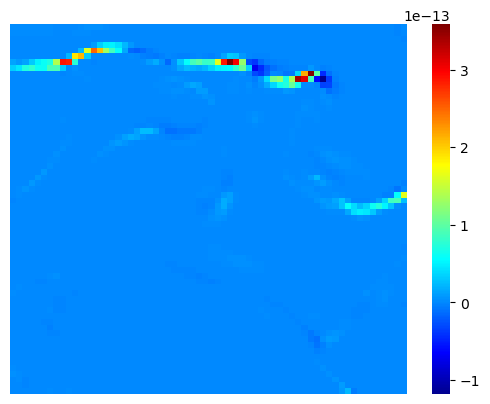

In [111]:
plotting.show_image(F_s_y)

## Low

In [119]:
low_outputs = llc_io.grab_velocity(sub_tbl.iloc[clse_2[0]], add_SST=True, add_Salt=True,
                                    local_path=os.path.join(os.getenv('OS_OGCM'),
                                                            'LLC', 'data', 'ThetaUVSalt'))

In [124]:
U, V, Theta, Salt = low_outputs

In [131]:
dUdx, dVdx, dUdy, rho, dbdx, dbdy, F_s_x, F_s_y = calc_all(low_outputs)

<Axes: >

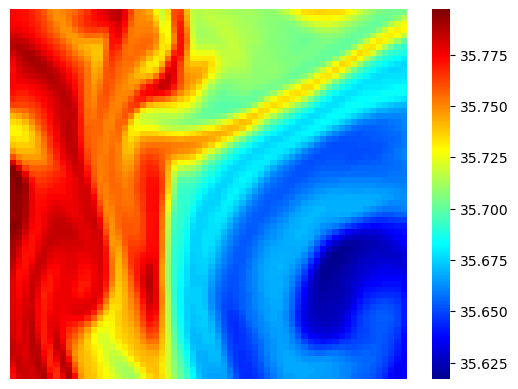

In [132]:
plotting.show_image(Salt)

<Axes: >

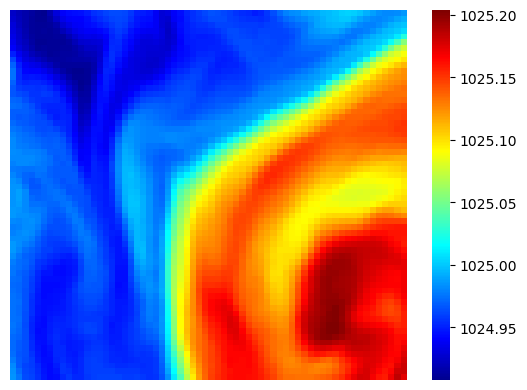

In [133]:
plotting.show_image(rho)

<Axes: >

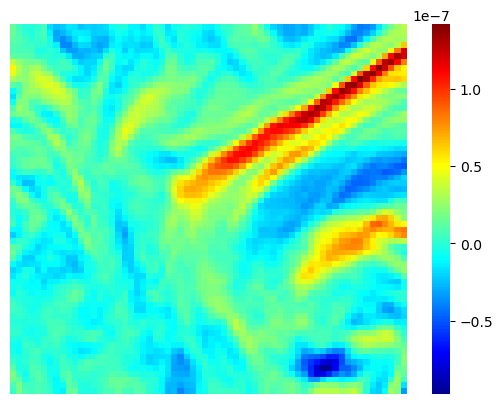

In [134]:
plotting.show_image(dbdy)

<Axes: >

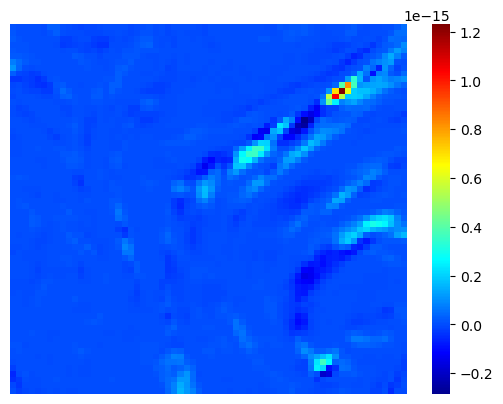

In [135]:
 plotting.show_image(F_s_y)